### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [77]:
data = pd.read_csv('data/coupons.csv')

In [78]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

#### Data types and non-null count to investigate the data

In [79]:
#Find out data types & number of Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Following columns have Null values: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 

#### Number of null values

In [43]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

#### Unique value counts of each columns to discover problematic data

In [80]:
#Check value counts for unusual values
data['destination'].value_counts(dropna=False)

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [81]:
data['passanger'].value_counts(dropna=False)

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

In [82]:
data['weather'].value_counts(dropna=False)

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [83]:
data['temperature'].value_counts(dropna=False)

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [84]:
data['time'].value_counts(dropna=False)

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

In [85]:
data['coupon'].value_counts(dropna=False)

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [86]:
data['expiration'].value_counts(dropna=False)

1d    7091
2h    5593
Name: expiration, dtype: int64

In [87]:
data['gender'].value_counts(dropna=False)

Female    6511
Male      6173
Name: gender, dtype: int64

In [88]:
data['age'].value_counts(dropna=False)

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [89]:
data['maritalStatus'].value_counts(dropna=False)

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

In [90]:
data['has_children'].value_counts(dropna=False)

0    7431
1    5253
Name: has_children, dtype: int64

In [91]:
data['education'].value_counts(dropna=False)

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

In [20]:
data['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [92]:
data['income'].value_counts(dropna=False)

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [93]:
data['car'].value_counts(dropna=False)

NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64

In [94]:
#feature meaning: how many times do you go to a bar every month?
data['Bar'].value_counts(dropna=False)

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: Bar, dtype: int64

In [95]:
#feature meaning: how many times do you go to a coffeehouse every month?
data['CoffeeHouse'].value_counts(dropna=False)

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: CoffeeHouse, dtype: int64

In [96]:
#feature meaning: how many times do you get take-away food every month?
data['CarryAway'].value_counts(dropna=False)

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: CarryAway, dtype: int64

In [97]:
#feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?
data['RestaurantLessThan20'].value_counts(dropna=False)

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: RestaurantLessThan20, dtype: int64

In [98]:
#feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?
data['Restaurant20To50'].value_counts(dropna=False)

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: Restaurant20To50, dtype: int64

In [99]:
#feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 5 minutes
data['toCoupon_GEQ5min'].value_counts(dropna=False)

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [100]:
#feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes
data['toCoupon_GEQ15min'].value_counts(dropna=False)

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

In [101]:
#feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes
data['toCoupon_GEQ25min'].value_counts(dropna=False)

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

In [102]:
#feature meaning: whether the restaurant/bar is in the same direction as your current destination
data['direction_same'].value_counts(dropna=False)

0    9960
1    2724
Name: direction_same, dtype: int64

In [103]:
#feature meaning: whether the restaurant/bar is in the opposite direction as your current destination
data['direction_opp'].value_counts(dropna=False)

1    9960
0    2724
Name: direction_opp, dtype: int64

In [104]:
data['Y'].value_counts(dropna=False)

1    7210
0    5474
Name: Y, dtype: int64

After examining missing values and possible poblometic values, it is found that the 'car' variable only has 108 non-null values out of 12684 records. Also, 'toCoupon_GEQ5min' varibale has the same values for all the records, so it does not add any additional information for the analysis. 

3. Decide what to do about your missing data -- drop, replace, other...

#### car
More than 99% of the values are missing. We will drop the column.

In [105]:
#Drop 'car' column
data.drop(columns=['car'], inplace=True)

#### toCoupon_GEQ5min
'toCoupon_GEQ5min' varibale has the same values for all the records. Since it does not provide additional information to the dataset, we will also drop this column.


In [106]:
#Drop 'toCoupon_GEQ5min' column
data.drop(columns=['toCoupon_GEQ5min'], inplace=True)

#### Other columns with missing data
There are five more columns with missing data: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
There are different types of missing data, and we need to figure out if missing data are related to each other before we decide what to do with them.

* MCAR : Missing completely at random
* MAR: Missing at random
* MNAR: Missing not at random

Knowing this mechanism is important becuase, according to [this article](https://www.theanalysisfactor.com/missing-data-mechanism/), multiple imputation and maximum likelihood assume the data are at least missing at random, and deletion requires the data are MCAR in order to not introduce bias in the results.

To explore the missing values in the data, I used 'missingno' library.


In [46]:
#install missingno library
!pip install missingno

In [47]:
import missingno as msno

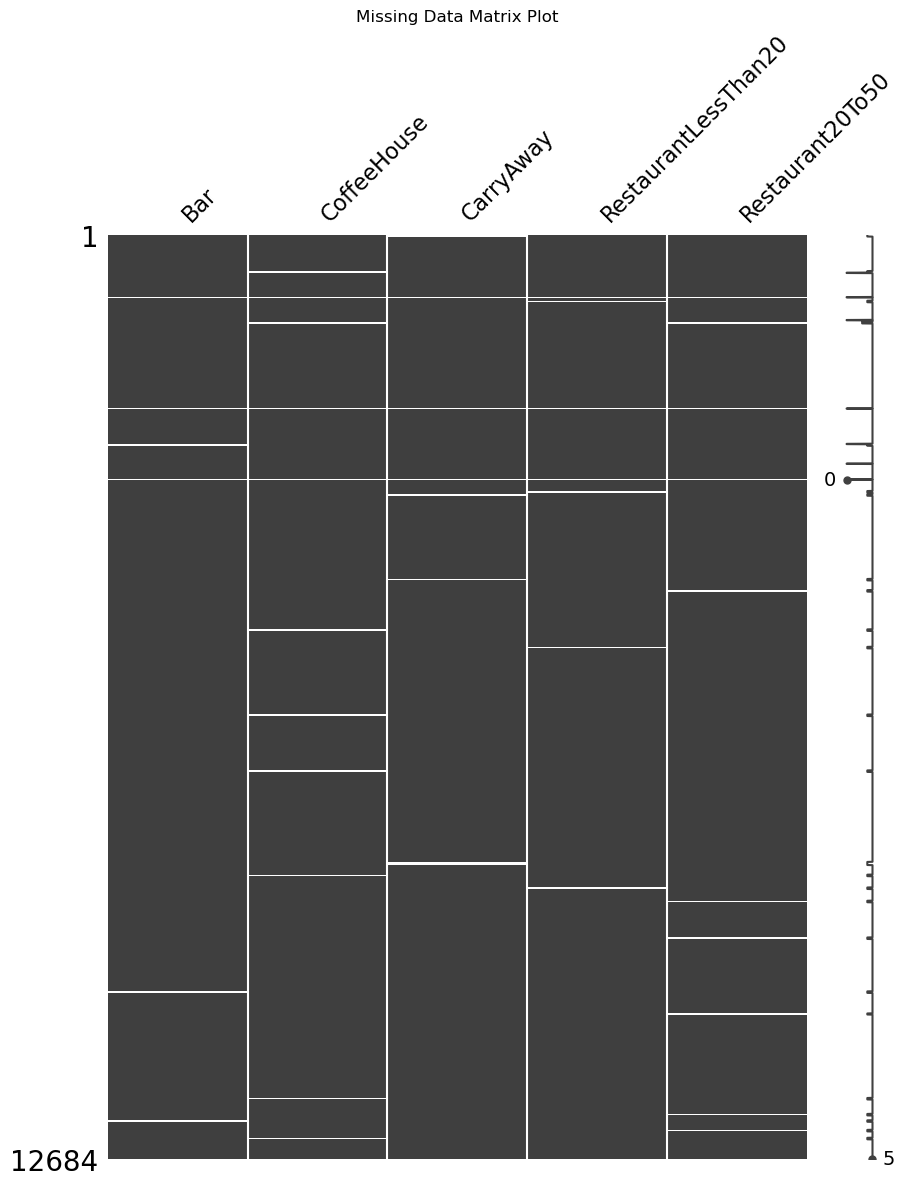

In [65]:
#Matrix Chart
na_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
na_data = data[na_columns]
msno.matrix(na_data, figsize=(10, 12))
plt.title("Missing Data Matrix Plot")
plt.show()

This matrix plot shows how the missing data is distributed in the dataset. The gray area is where the data is present, and the white area is where the data is missing. It seems that the missing values in each column are not related to each other. To delve into the relationship, let's look at the heatmap.

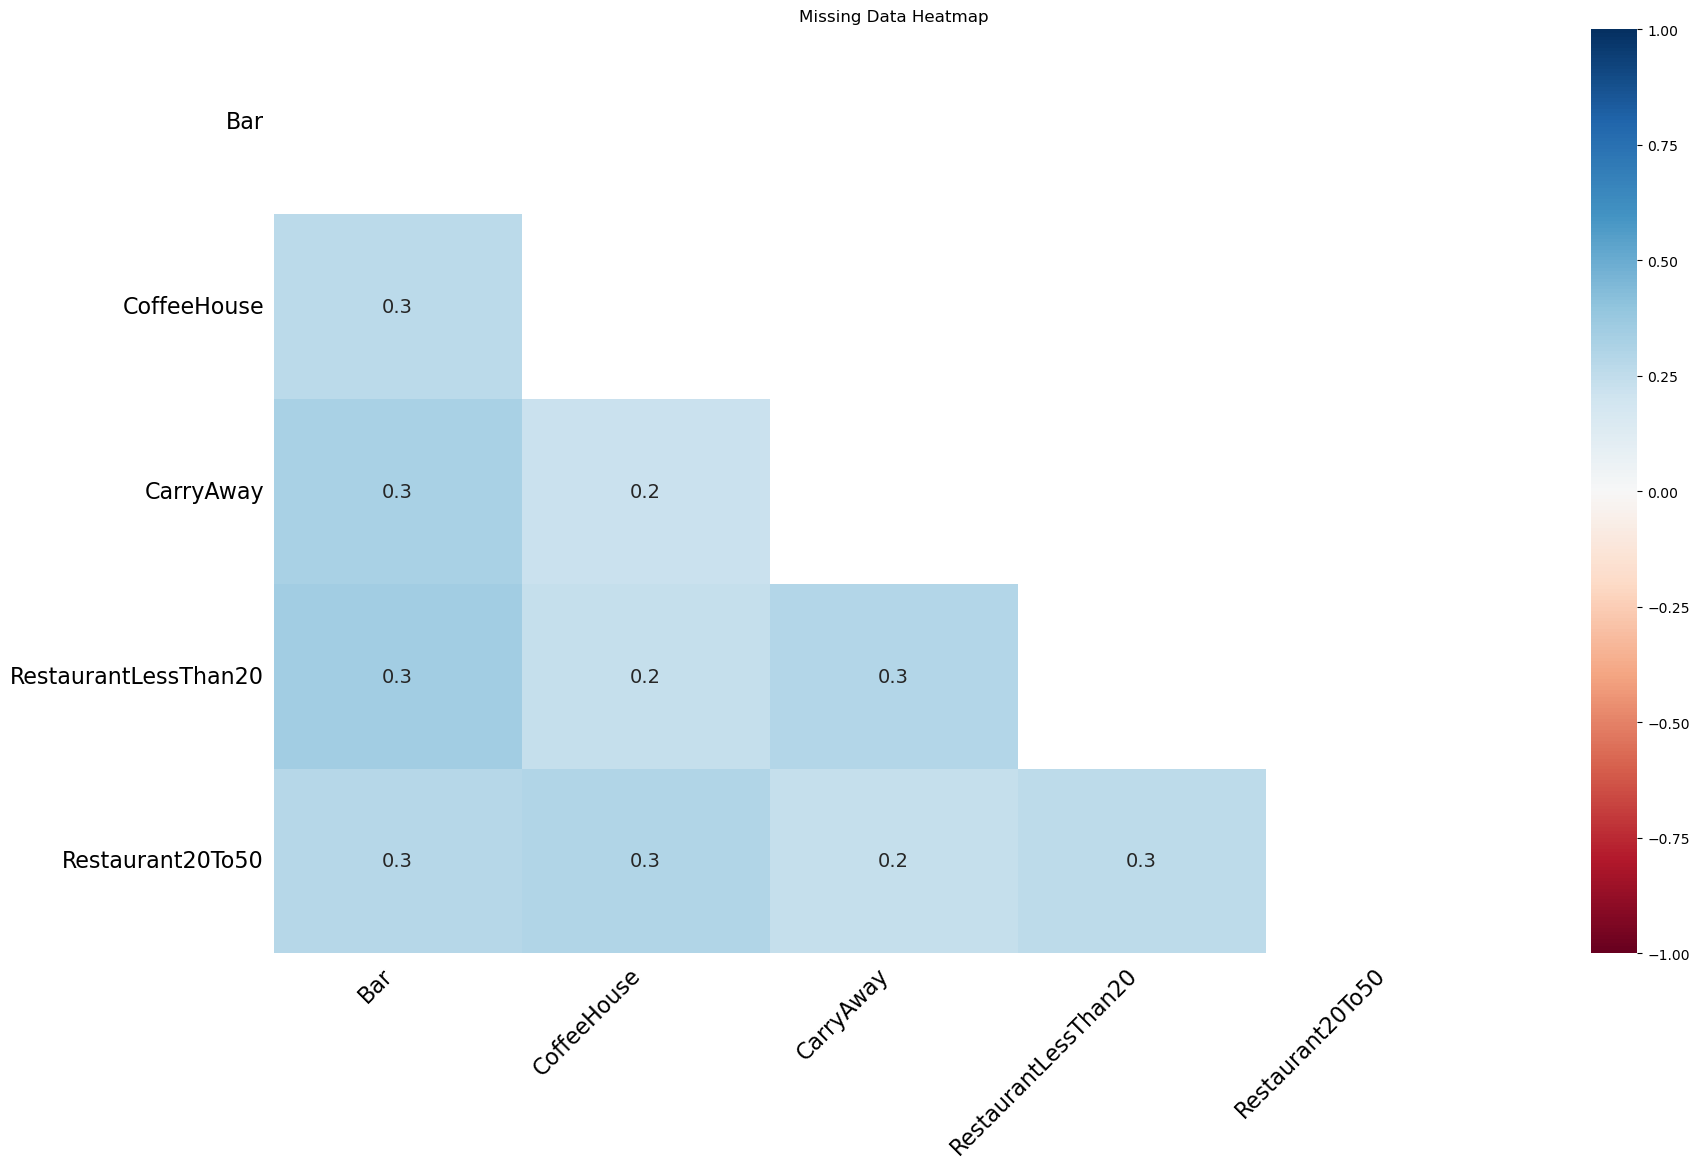

In [67]:
#Heatmap
msno.heatmap(na_data)
plt.title('Missing Data Heatmap')
plt.show()

Heatmap shows the relationship of the presence of null values between each of the different columns. If the correlation value is close to positive 1, it means that the presence of null values of one column is positively correlated to the presence of the other column. The low correlation again shows that the missing data is at least MAR (missing at random) and that we can imputate the data. 

#### Data Imputation
I found that there is low correlation of the presence of missing values between each column that has null values. Since all columns with missing data are captegorical variable, I will impute the missing data with the most frequent value. 

In [111]:
clean_data = data

for x in clean_data.columns[clean_data.isna().any()]:
    clean_data = clean_data.fillna({x: clean_data[x].value_counts().idxmax()})
    
clean_data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0


In [112]:
#Check if there is any null value
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [113]:
clean_data.query('Y == 1').shape[0] / clean_data.shape[0]

0.5684326710816777

56.84% of the observed data accepted the coupn.

5. Use a bar plot to visualize the `coupon` column.

In [114]:
sns.barplot(data=clean_data, x='coupon')

TypeError: Horizontal orientation requires numeric `x` variable.

6. Use a histogram to visualize the temperature column.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  